<a href="https://colab.research.google.com/github/JSEFERINO/JHSERIES2/blob/main/14_Series_Tiempo_Cap12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Curso Introductorio Series de Tiempo por Julio Hurtado Márquez**
## **Text: Time Series Forecasting in Python - MARCO PEIXEIRO**
# **Parte 3. Predicciones a gran escala con aprendizaje profundo**

## **Introducción**
+ Los modelos estadísticos tienen sus limitaciones, especialmente cuando un conjunto de datos es grande y tiene muchas características y relaciones no lineales.
+ En tales casos, el aprendizaje profundo es la herramienta perfecta para la previsión de series temporales.
+ En esta parte del libro, trabajaremos con un conjunto de datos masivo y aplicaremos diferentes arquitecturas de aprendizaje profundo, como **la memoria a corto plazo larga (LSTM), una red neuronal convolucional (CNN) y una red neuronal profunda autorregresiva, para predecir el futuro de nuestra serie**.
+ Nuevamente, concluiremos esta parte con un proyecto final para poner a prueba sus habilidades.
+ El aprendizaje profundo es un subconjunto del aprendizaje automático y, por lo tanto, es posible utilizar algoritmos de aprendizaje automático más tradicionales para la previsión de series temporales, como **árboles potenciados por gradiente**.
+ Para mantener esta sección razonable, no cubriremos esas técnicas específicamente, aunque se requiere la creación de ventanas de datos para pronosticar series temporales con aprendizaje automático, y aplicaremos este concepto numerosas veces.


# **12. Introducción al aprendizaje profundo para el Pronóstico de series temporales**

## **Esta parte de Este capítulo cubre**
+ Uso del aprendizaje profundo para el Pronóstico
+ Exploración de diferentes tipos de modelos de aprendizaje profundo
+ Preparación para aplicar el aprendizaje profundo a el Pronóstico de series temporales.

## **Deep learning o aprendizaje profundo**
+ En el último capítulo, concluimos la parte del libro sobre el Pronóstico de series temporales mediante modelos estadísticos.
+ Esos modelos funcionan particularmente bien cuando se tienen conjuntos de datos pequeños (normalmente menos de 10000 puntos de datos) y cuando el período estacional es mensual, trimestral o anual.
+ En situaciones en las que hay estacionalidad diaria o donde el conjunto de datos es muy grande (más de 10 000 puntos de datos), esos modelos estadísticos se vuelven muy lentos y su rendimiento se degrada.
+ Por lo tanto, recurrimos al **aprendizaje profundo**.
+ El **aprendizaje profundo** es un subconjunto del *aprendizaje automático* que se centra en la creación de modelos en la arquitectura de la *red neuronal*.
+ ***El aprendizaje profundo*** tiene la ventaja de que tiende a funcionar mejor cuanto más datos hay disponibles, lo que lo convierte en una excelente opción para pronosticar series temporales de alta dimensión.
+ En esta parte del libro, exploraremos varias arquitecturas de modelos para que tenga un conjunto de herramientas para abordar prácticamente cualquier problema de pronóstico de series temporales.
+ ***Tenga en cuenta que asumiré que está familiarizado con el aprendizaje profundo, por lo que debe conocer temas como funciones de activación, funciones de pérdida, lotes, capas y épocas.***
+ Esta parte del libro no servirá como una introducción al aprendizaje profundo, sino que se centra en la aplicación del aprendizaje profundo a la previsión de series temporales.

+ Por supuesto, se explicará en detalle cada arquitectura de modelo y obtendrá una intuición sobre por qué una arquitectura en particular podría funcionar mejor que otra en situaciones particulares.
+ A lo largo de estos capítulos, utilizaremos *TensorFlow*, o más específicamente *Keras*, para crear diferentes modelos de aprendizaje profundo.
+ **En este capítulo específicamente, identificamos las condiciones que justifican el uso del aprendizaje profundo y exploramos los diferentes tipos de modelos que se pueden crear, como modelos de un solo paso, de varios pasos y de múltiples salidas**.
+ Concluiremos el capítulo con la configuración inicial que nos preparará para aplicar modelos de aprendizaje profundo en los siguientes capítulos.
+ Finalmente, exploraremos los datos, realizaremos ingeniería de características y dividiremos los datos en conjuntos de entrenamiento, validación y prueba.

# **12.1. Cuándo utilizar el aprendizaje profundo para la previsión de series temporales**
+ *El aprendizaje profundo destaca cuando tenemos conjuntos de datos grandes y complejos*.
+ En esas situaciones, el aprendizaje profundo puede aprovechar todos los datos disponibles para inferir relaciones entre cada característica
y el objetivo, lo que generalmente da como resultado buenos pronósticos.
+ En el contexto de las series temporales, se considera que un conjunto de datos es grande cuando tenemos más de 10000 puntos de datos.
+ Por supuesto, esto es una aproximación en lugar de un límite estricto, por lo que si tiene 8000 puntos de datos, el aprendizaje profundo podría ser una opción viable.
+ **Cuando el tamaño del conjunto de datos es grande, cualquier declinación del modelo SARIMAX tardará mucho tiempo en ajustarse, lo que no es ideal para la selección de modelos, ya que generalmente ajustamos muchos modelos durante ese paso.**
+ ***Si sus datos tienen múltiples períodos estacionales, no se puede utilizar el modelo SARIMAX.***
+ ***Por ejemplo, suponga que debe pronosticar la temperatura por hora. Es razonable suponer que habrá estacionalidad diaria, ya que la temperatura tiende a ser más baja por la noche y más alta durante el día, pero también hay estacionalidad anual, debido a que las temperaturas son más bajas en invierno y más altas durante el verano.***
+ *En tal caso, se puede utilizar el aprendizaje profundo para aprovechar la información de ambos períodos estacionales para realizar pronósticos*.
+ De hecho, por experiencia, ajustar un modelo SARIMA en un caso así generalmente dará como resultado residuos que no se distribuyen normalmente y aún están correlacionados, lo que significa que el modelo no se puede usar en absoluto.
+ ***En última instancia, el aprendizaje profundo se utiliza cuando los modelos estadísticos tardan demasiado en ajustarse o cuando dan como resultado residuos correlacionados que no se aproximan al ruido blanco.***
+ Esto puede deberse al hecho de que hay otro período estacional que no se puede considerar en el modelo, o simplemente porque hay una relación no lineal entre las características y el objetivo.
+ En esos casos, los modelos de aprendizaje profundo se pueden utilizar para capturar esta relación no lineal, y tienen la ventaja adicional de ser muy rápidos de entrenar.

# **12.2. Exploración de los diferentes tipos de modelos de aprendizaje profundo**
+ Hay tres tipos principales de modelos de aprendizaje profundo que podemos crear para la previsión de series temporales: **modelos de un solo paso, modelos de varios pasos y modelos de múltiples salidas.**
+ El modelo de un solo paso es el más simple de los tres. Su salida es un único valor que representa la previsión de una variable un paso en el futuro.
+ Por lo tanto, el modelo simplemente devuelve un escalar, como se muestra en la figura 12.1.

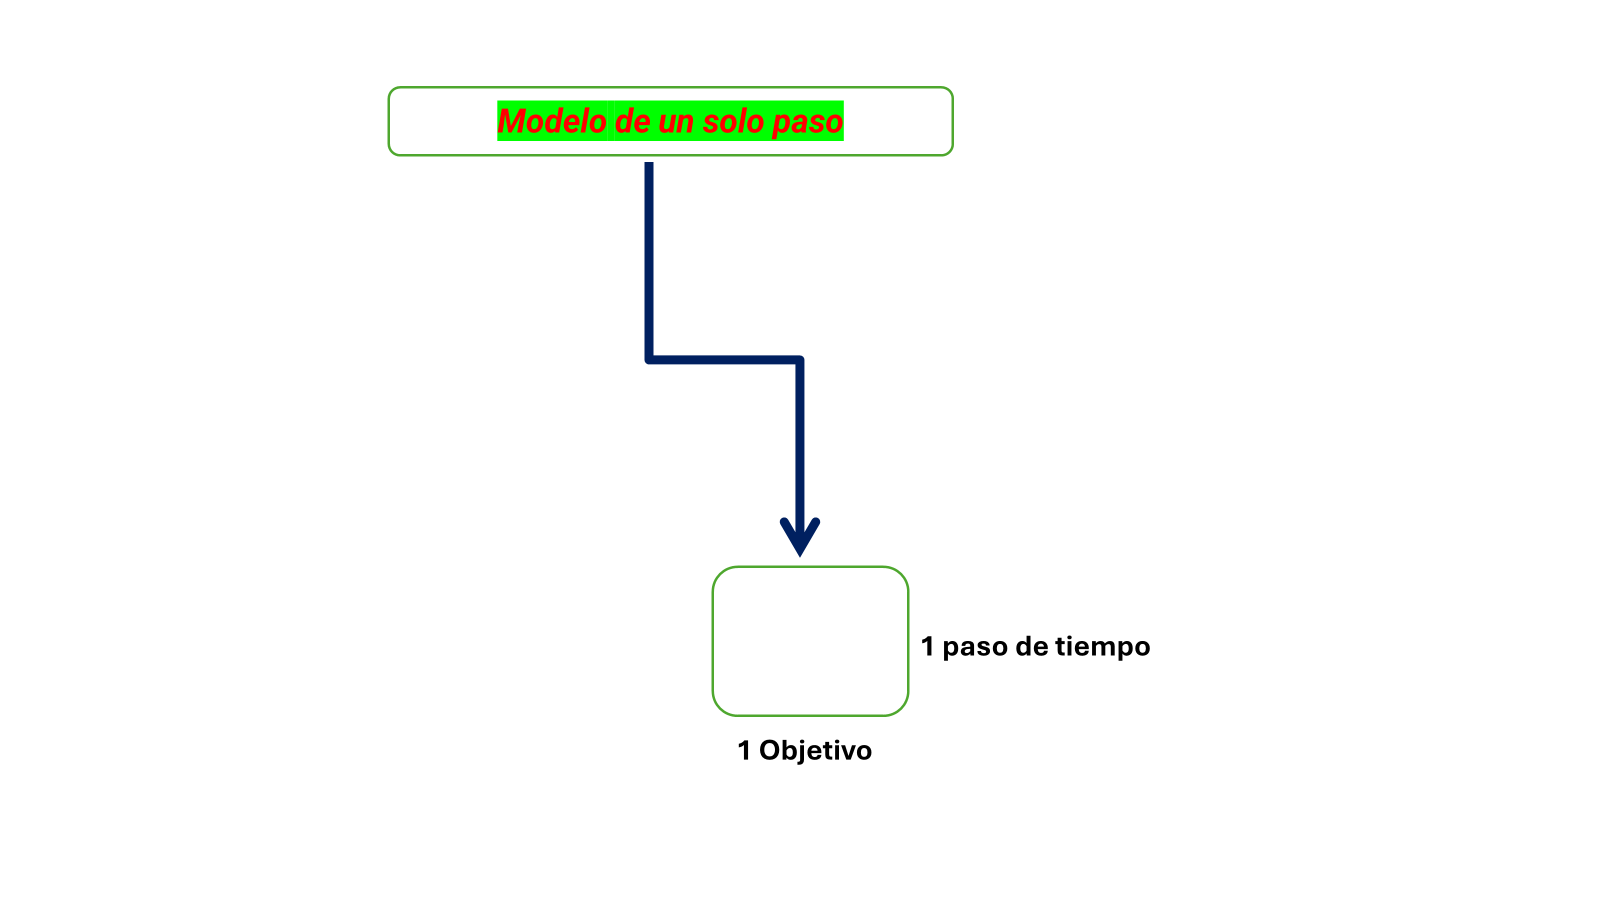

+ **Figura 12.1 El modelo de un solo paso genera el valor de un objetivo en un paso de tiempo en el futuro. Por lo tanto, el resultado es un valor escalar.**

+ A continuación, podemos tener un modelo de varios pasos, lo que significa que generamos el valor para un objetivo, pero para muchos intervalos de tiempo en el futuro.
+ Por ejemplo, dados los datos por hora, es posible que queramos pronosticar las próximas 24 horas.
+ En ese caso, tenemos un modelo de varios pasos, ya que estamos pronosticando 24 intervalos de tiempo en el futuro.
+ El resultado es una matriz de 24 × 1, como se muestra en la figura 12.2.

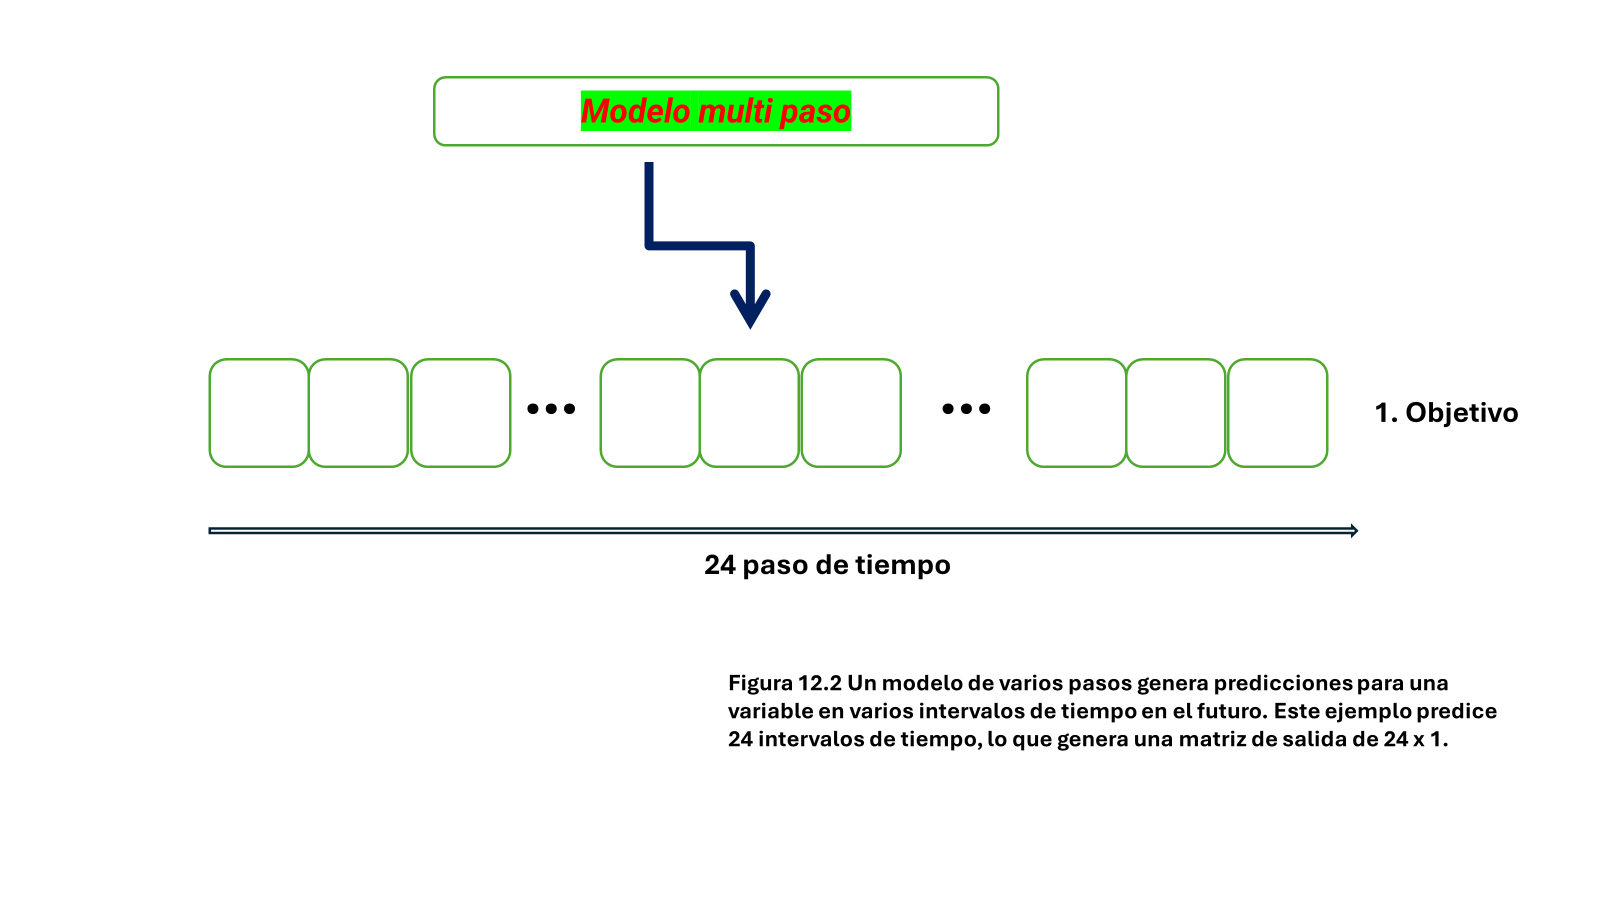

+ Por último, el modelo de múltiples salidas genera predicciones para más de un objetivo.
+ Por ejemplo, si tuviéramos que predecir tanto la temperatura como la humedad, utilizaríamos un modelo de múltiples salidas.
+ Este modelo puede generar tantos intervalos de tiempo como se desee. En la figura 12.3, se muestra un modelo de múltiples salidas que devuelve predicciones para dos características para los próximos 24 intervalos de tiempo. En ese caso particular, la salida es una matriz de 24 x 2.

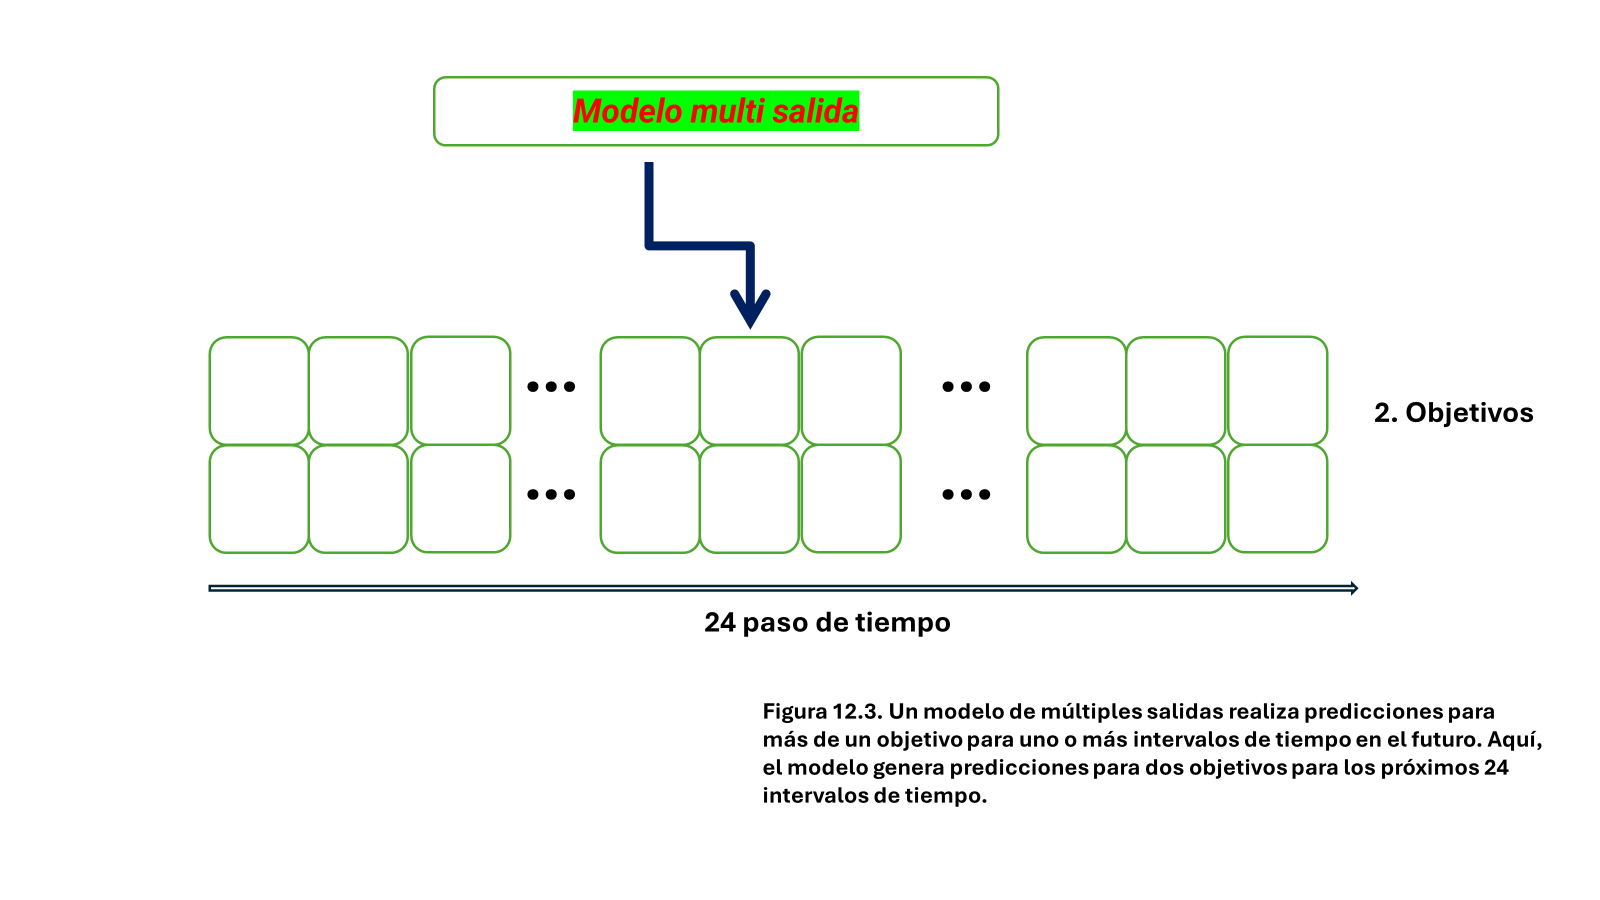

+ Cada uno de estos modelos puede tener diferentes arquitecturas.
+ Por ejemplo, *una red neuronal convolucional* se puede utilizar como un modelo de un solo paso, un modelo de varios pasos o un modelo de múltiples salidas.
+ En los siguientes capítulos, implementaremos diferentes arquitecturas de modelos y las aplicaremos para los tres tipos de modelos.
+ Esto nos lleva a la etapa en la que realizaremos la configuración inicial para los diferentes modelos de aprendizaje profundo que implementaremos en los próximos cinco capítulos.

# **12.3. Preparación para aplicar el aprendizaje profundo para el pronostico**
+ Desde aquí hasta el capítulo 17, utilizaremos el conjunto de datos del volumen de tráfico interestatal metropolitano disponible en el repositorio de aprendizaje automático de UCI.
+ ***El conjunto de datos original registró el tráfico por hora en dirección oeste en la I-94 entre Minneapolis y St. Paul en Minnesota, desde 2012 hasta 2018.***
+ Con el fin de aprender a aplicar el aprendizaje profundo para la previsión de series temporales, el conjunto de datos se ha acortado y limpiado para eliminar
los valores faltantes.
+ Si bien los pasos de limpieza no se cubren en este capítulo, aún puede consultar el código de preprocesamiento en el repositorio de GitHub para este capítulo.
+ Nuestro principal objetivo de previsión es predecir el volumen de tráfico por hora. En el caso de los modelos de múltiples salidas, también pronosticaremos la temperatura por hora.
+ En esta configuración inicial para los próximos capítulos, cargaremos los datos, realizaremos ingeniería de características y los dividiremos
en conjuntos de entrenamiento, validación y prueba.
+ Usaremos TensorFlow, o más específicamente Keras, en esta parte del libro. Al momento de escribir esto, la última versión estable de TensorFlow era 2.6.0, que es la que usaré en este y los siguientes capítulos.

# **12.3.1. Resolviendo el problema**.

# **Paso 1. Las librerias de necesarias**
+ El primer paso natural es importar las bibliotecas que serán necesarias para completar el proyecto.
+ Luego podemos cargar los datos y almacenarlos en un DataFrame para usarlos durante todo el proyecto.
+ Por lo tanto, importaremos las siguientes bibliotecas y especificaremos la función mágica %matplotlib inline para mostrar los gráficos en el cuaderno:

In [ ]:
#### **Paso 1. Las librerias de necesarias**
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model, Sequential

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

from tensorflow.keras.layers import Dense, Conv1D, LSTM, Lambda, Reshape, RNN, LSTMCell


In [ ]:
# Ignorar advertencias innecesarias
import warnings
warnings.filterwarnings('ignore')

# **Paso 2. Importando los datos**
+ Una vez importadas las bibliotecas, podemos leer los datos y almacenarlos en un DataFrame.
+ Como se mencionó, este conjunto de datos es una versión abreviada y depurada del conjunto de datos original disponible en el repositorio de aprendizaje automático de UCI.
+ En este caso, el conjunto de datos comienza el 29 de septiembre de 2016 a las 5 p. m. y finaliza el 30 de septiembre de 2018 a las 11 p. m.
+ Si utilizamos df.shape, podemos ver que tenemos un total de seis características y 17551 filas.
+ Las características incluyen la fecha y la hora, la temperatura, la cantidad de lluvia y nieve, la cobertura de nubes y el volumen de tráfico. La Tabla 12.1 describe cada columna con más detalle.

+ **Tabla 12.1 Variables en el conjunto de datos de volumen de tráfico interestatal metropolitano**


|Característica |Descripción|
|:--|:--:|
|date_time| Fecha y hora de los datos, registrados en la zona horaria CST. El formato es AAAA-MM-DD HH:MM:SS.
|temp |Temperatura promedio registrada en la hora, expresada en Kelvin.
|rain_1h| Cantidad de lluvia que cayó en la hora, expresada en milímetros.
|snow_1h| Cantidad de nieve que cayó en la hora, expresada en milímetros.
|clouds_all| Porcentaje de nubosidad durante la hora.
|Traffic_volume| Volumen de tráfico informado en dirección oeste por la I-94 durante la hora.

In [ ]:
## **Paso 2. Importando los datos**

df = pd.read_csv('/content/metro_interstate_traffic_volume_preprocessed.csv')
df.head(10) # Muestra las primeras cinco filas de datos.


,date_time,temp,rain_1h,snow_1h,clouds_all,traffic_volume
0,2016-09-29 17:00:00,291.75,0.0,0,0,5551.0
1,2016-09-29 18:00:00,290.36,0.0,0,0,4132.0
2,2016-09-29 19:00:00,287.86,0.0,0,0,3435.0
3,2016-09-29 20:00:00,285.91,0.0,0,0,2765.0
4,2016-09-29 21:00:00,284.31,0.0,0,0,2443.0
5,2016-09-29 22:00:00,284.37,0.0,0,0,2076.0
6,2016-09-29 23:00:00,284.53,0.0,0,0,1116.0
7,2016-09-30 00:00:00,284.26,0.0,0,0,660.0
8,2016-09-30 01:00:00,283.99,0.0,0,0,384.0
9,2016-09-30 02:00:00,283.17,0.0,0,0,281.0


In [ ]:
df.shape

(17551, 6)

In [ ]:
# Muestra el tamaño de mis datos.
print(len(df))

17551


In [ ]:
# Muestra las ultimas 10 filas de datos.
df.tail(10)

,date_time,temp,rain_1h,snow_1h,clouds_all,traffic_volume
17541,2018-09-30 14:00:00,283.48,0.00,0,90,4380.0
17542,2018-09-30 15:00:00,283.84,0.00,0,75,4302.0
17543,2018-09-30 16:00:00,284.38,0.00,0,75,4283.0
17544,2018-09-30 17:00:00,284.79,0.00,0,75,4132.0
17545,2018-09-30 18:00:00,284.20,0.25,0,75,3947.0
17546,2018-09-30 19:00:00,283.45,0.00,0,75,3543.0
17547,2018-09-30 20:00:00,282.76,0.00,0,90,2781.0
17548,2018-09-30 21:00:00,282.73,0.00,0,90,2159.0
17549,2018-09-30 22:00:00,282.09,0.00,0,90,1450.0
17550,2018-09-30 23:00:00,282.12,0.00,0,90,954.0


# **Paso 3. Dibuje nuestra variable objetivo de Pronostico**
+ Ahora, visualicemos la evolución del volumen de tráfico a lo largo del tiempo.
+ Dado que nuestro conjunto de datos es muy grande, con más de 17000 registros, representaremos gráficamente solo los primeros 400 puntos de datos, lo que equivale aproximadamente a dos semanas de datos.
+ El resultado se muestra en la figura 12.4.

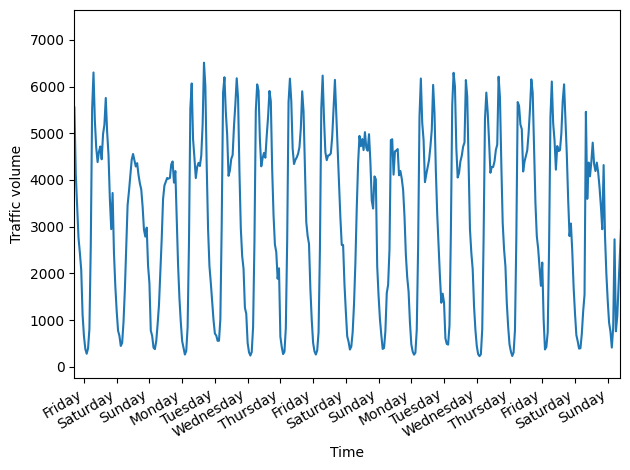

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['traffic_volume'])
ax.set_xlabel('Time')
ax.set_ylabel('Traffic volume')

plt.xticks(np.arange(7, 400, 24), ['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlim(0, 400)

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures', dpi=300)

+ En la figura 12.4 se puede apreciar una estacionalidad diaria clara, ya que el volumen de tráfico es menor al principio y al final de cada día.
+ También se puede observar un volumen de tráfico menor durante los fines de semana.
+ En cuanto a la tendencia, es probable que dos semanas de datos no sean suficientes para sacar una conclusión razonable, pero parece que el volumen no aumenta ni disminuye con el tiempo en la figura.
+ También podemos representar gráficamente la temperatura por hora, ya que será un objetivo para nuestros modelos de múltiples salidas.
+ Aquí, esperamos ver estacionalidad anual y diaria.
+ La estacionalidad anual debería deberse a las estaciones del año, mientras que la estacionalidad diaria se deberá al hecho de que las temperaturas tienden a ser más bajas por la noche y más altas durante el día.

# **Paso 4. Si existe algun patron estacional construya un grafico donde se aprecie el patron**
+ Primero, visualicemos la temperatura horaria en todo el conjunto de datos para ver si podemos identificar alguna estacionalidad anual. El resultado se muestra en la figura 12.5.

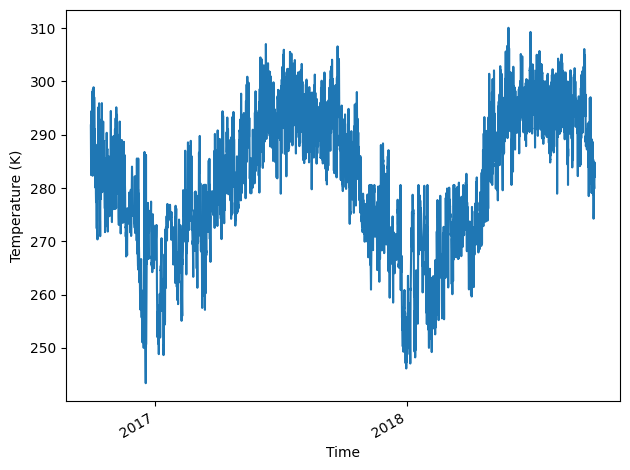

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['temp'])
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (K)')

plt.xticks([2239, 10999], [2017, 2018])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures', dpi=300)

+ **Figura 12.5 Temperatura horaria (en Kelvin) del 29 de septiembre de 2016 al 30 de septiembre de 2018. Aunque hay ruido, podemos ver un patrón estacional anual.**


### **Acerca de la descomposición de la serie**
+ En la figura 12.5 se puede observar un patrón estacional anual en la temperatura horaria, ya que las temperaturas son más bajas a finales y principios de año (invierno en Minnesota) y más altas a mediados de año (verano).
+ Por lo tanto, como se esperaba, la temperatura tiene estacionalidad anual.
+ Ahora, verifiquemos si podemos observar estacionalidad diaria en la temperatura. El resultado se muestra en la figura 12.6.

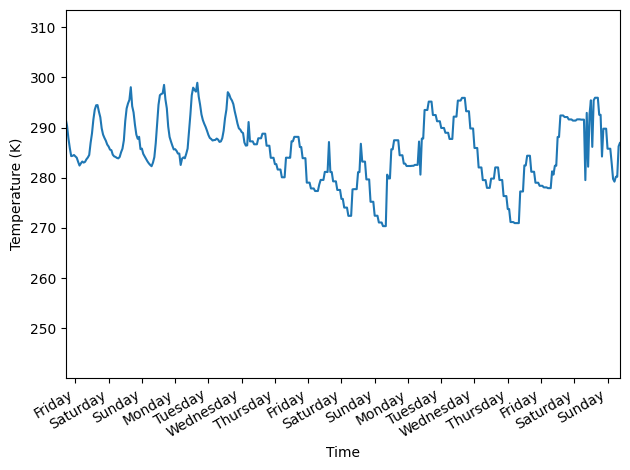

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['temp'])
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (K)')

plt.xticks(np.arange(7, 400, 24), ['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlim(0, 400)

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures', dpi=300)

+ **Figura 12.6 Temperatura horaria (en Kelvin) a partir del 29 de septiembre de 2016 a las 5 p.m. CST. Aunque es un poco ruidosa, podemos ver que las temperaturas son efectivamente más bajas al principio y al final de cada día y alcanzan su punto máximo durante el mediodía, lo que sugiere una estacionalidad diaria.**
+ En la figura 12.6 se puede observar que la temperatura es más baja al principio y al final de cada día y alcanza su punto máximo hacia la mitad de cada día. Esto sugiere una estacionalidad diaria, tal como observamos para el volumen de tráfico en la figura 12.4.

# **Paso 5. Ingeniería de características y división de datos**
## **12.3.2. Ingeniería de características y división de datos**
+ Una vez que hayamos terminado de explorar los datos, pasaremos a la ingeniería de características y la división de datos.
+ En esta sección, estudiaremos cada característica y crearemos otras nuevas que ayudarán a nuestros modelos a pronosticar el volumen de tráfico y la temperatura por hora.
+ Por último, dividiremos los datos y guardaremos cada conjunto como un archivo CSV para su uso posterior.
+ Una excelente manera de estudiar las características de un conjunto de datos es utilizar el método describe de pandas.
+ Este método devuelve la cantidad de registros para cada característica, lo que nos permite identificar rápidamente los valores faltantes, la media, la desviación estándar, los cuartiles y los valores máximos y mínimos de cada característica.

## **a. El método de transposición coloca cada entidad en su propia fila**

+ A partir de la salida, notará que rain_1h es mayoritariamente 0 en todo el conjunto de datos, ya que su tercer cuartil aún está en 0.
+ Dado que al menos el 75 % de los valores de rain_1h son 0, es poco probable que sea un predictor sólido del volumen de tráfico. Por lo tanto, esta característica se eliminará.
+ Si observa snow_1h, notará que esta variable está en 0 en todo el conjunto de datos. Esto es fácilmente observable, ya que sus valores mínimo y máximo son ambos 0.
+ Por lo tanto, esto no predice la variación en el volumen de tráfico a lo largo del tiempo. Esta característica también se eliminará del conjunto de datos.

In [ ]:
df.describe().transpose() # El método de transposición coloca cada entidad en su propia fila.

,count,mean,std,min,25%,50%,75%,max
temp,17551.0,281.416203,12.688262,243.39,272.22,282.41,291.89,310.07
rain_1h,17551.0,0.025523,0.259794,0.00,0.00,0.00,0.00,10.60
snow_1h,17551.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
clouds_all,17551.0,42.034129,39.065960,0.00,1.00,40.00,90.00,100.00
traffic_volume,17551.0,3321.484588,1969.223949,113.00,1298.00,3518.00,4943.00,7280.00


### **b. Eliminando las variables inocuas**

In [ ]:
### **b. Eliminando las variables inocuas**
cols_to_drop = ['rain_1h', 'snow_1h']
df = df.drop(cols_to_drop, axis=1)
df.shape

(17551, 4)

## **c. codificando la característica date_time**
+ Ahora llegamos al interesante problema de codificar el tiempo como una característica utilizable para nuestros modelos de aprendizaje profundo.
+ En este momento, la característica date_time no es utilizable por nuestros modelos, ya que es una cadena de fecha y hora.
+ Por lo tanto, la convertiremos en un valor numérico.
+ Una forma sencilla de hacerlo es expresar la fecha como una cantidad de segundos. Esto se logra mediante el uso del método timestamp de la biblioteca datetime.

In [ ]:
# **c. codificando la característica date_time**
timestamp_s = pd.to_datetime(df['date_time']).map(datetime.datetime.timestamp)

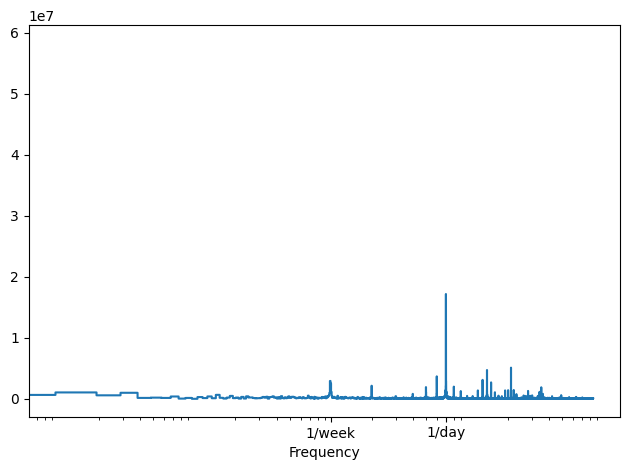

In [ ]:
fft = tf.signal.rfft(df['traffic_volume'])
f_per_dataset = np.arange(0, len(fft))

n_sample_h = len(df['traffic_volume'])
hours_per_week = 24 * 7
weeks_per_dataset = n_sample_h / hours_per_week

f_per_week = f_per_dataset / weeks_per_dataset

plt.step(f_per_week, np.abs(fft))
plt.xscale('log')
plt.xticks([1, 7], ['1/week', '1/day'])
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

#### **d. Acerca del paso anterior**
+ Lamentablemente, no hemos terminado, ya que esto simplemente expresa cada fecha en segundos, como se muestra en la figura 12.7.
+ Esto nos lleva a perder la naturaleza cíclica del tiempo, porque la cantidad de segundos simplemente aumenta linealmente con el tiempo.
+ Por lo tanto, debemos aplicar una transformación para recuperar el comportamiento cíclico del tiempo.

#### **e. Recuperando la propiedad ciclica**
+ Una forma sencilla de hacerlo es aplicar una transformación seno.
+ Sabemos que la función seno es cíclica, acotada entre -1 y 1. Esto nos ayudará a recuperar parte de la propiedad cíclica del tiempo.
+ **La marca de tiempo está en segundos, por lo que debemos calcular la cantidad de segundos de un día antes de aplicar la transformación del seno.**
+ **Aplicación de la transformación seno. Observe que utilizamos radianes en la función seno.**

In [ ]:
# **e. Recuperando la propiedad ciclica**
day = 24 * 60 * 60

df['day_sin'] = (np.sin(timestamp_s * (2*np.pi/day))).values
df['day_cos'] = (np.cos(timestamp_s * (2*np.pi/day))).values

In [ ]:
df = df.drop(['date_time'], axis=1) # Eliminar la columna date_time

df.head()

,temp,clouds_all,traffic_volume,day_sin,day_cos
0,291.75,0,5551.0,-0.965926,-2.588190e-01
1,290.36,0,4132.0,-1.000000,-4.048636e-12
2,287.86,0,3435.0,-0.965926,2.588190e-01
3,285.91,0,2765.0,-0.866025,5.000000e-01
4,284.31,0,2443.0,-0.707107,7.071068e-01


### **f. Transformacion seno - coseno**
+ Con una única transformación de seno, recuperamos parte de la propiedad cíclica que se perdió al convertir a segundos.
+ Sin embargo, en este punto, las 12 p. m. equivalen a las 12 a. m. y las 5 p. m. equivalen a las 5 a. m.
+ Esto no es deseable, ya que queremos distinguir entre la mañana y la tarde.
+ Por lo tanto, aplicaremos una transformación de coseno. Sabemos que el coseno está desfasado con la función seno.
+ Esto nos permite distinguir entre las 5 a. m. y las 5 p. m., expresando la naturaleza cíclica del tiempo en un día. En este punto, podemos eliminar la columna date_time del DataFrame.

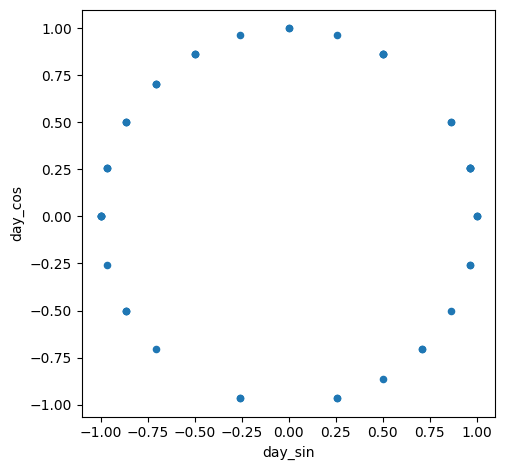

In [ ]:
# **f. Transformacion seno - coseno**
df.sample(50).plot.scatter('day_sin','day_cos').set_aspect('equal');
plt.tight_layout()

plt.savefig('figures', dpi=300)

## **Acerca de la Transformacion seno - coseno**
+ En la figura 12.8, notará que los puntos forman un círculo, como un reloj.
+ Por lo tanto, hemos expresado con éxito cada marca de tiempo como un punto en el reloj, lo que significa que ahora tenemos valores numéricos que conservan la naturaleza cíclica del tiempo en un día, y esto se puede usar en nuestros modelos de aprendizaje profundo.
+ Esto será útil ya que observamos la estacionalidad diaria tanto de la temperatura como del volumen de tráfico.

### **Paso 7. Conjunto de entrenamiento, validación y prueba**

+ *Una vez completada la ingeniería de características, ahora podemos dividir nuestros conjuntos de datos de entrenamiento, validación y prueba*.
+ El conjunto de entrenamiento es la muestra de datos que se usa para ajustar el modelo.
+ El conjunto de validación es un poco como un conjunto de prueba que el modelo puede revisar para ajustar sus hiperparámetros y mejorar su rendimiento durante el entrenamiento del modelo.
+ El conjunto de prueba está completamente separado del procedimiento de entrenamiento del modelo y se usa para una evaluación imparcial del rendimiento del modelo.
+ **Aquí usaremos una división simple de 70:20:10 para los conjuntos de entrenamiento, validación y prueba. Si bien el 10% de los datos parece una porción pequeña para el conjunto de prueba, recuerde que tenemos más de 17000 registros, lo que significa que evaluaremos el modelo en más de 1000 puntos de datos, lo cual es más que suficiente.**

In [ ]:
n = len(df)

# Split 70:20:10 (train:validation:test)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

train_df.shape, val_df.shape, test_df.shape

print(f'Longitud del conjunto de Datos es = {len(df)}')
print(f'Longitud del conjunto de Entrenamiento es = {len(train_df)}')
print(f'Longitud del conjunto de Validación es = {len(val_df)}')
print(f'Longitud del conjunto de prueba es = {len(test_df)}')



Longitud del conjunto de Datos es = 17551
Longitud del conjunto de Entrenamiento es = 12285
Longitud del conjunto de Validación es = 3510
Longitud del conjunto de prueba es = 1756


In [ ]:
df.head() # recordemos cuales son nuestras variables

,temp,clouds_all,traffic_volume,day_sin,day_cos
0,291.75,0,5551.0,-0.965926,-2.588190e-01
1,290.36,0,4132.0,-1.000000,-4.048636e-12
2,287.86,0,3435.0,-0.965926,2.588190e-01
3,285.91,0,2765.0,-0.866025,5.000000e-01
4,284.31,0,2443.0,-0.707107,7.071068e-01


In [ ]:
df.tail() # recordemos cuales son nuestras variables

,temp,clouds_all,traffic_volume,day_sin,day_cos
17546,283.45,75,3543.0,-0.965926,0.258819
17547,282.76,90,2781.0,-0.866025,0.500000
17548,282.73,90,2159.0,-0.707107,0.707107
17549,282.09,90,1450.0,-0.500000,0.866025
17550,282.12,90,954.0,-0.258819,0.965926


### **Paso 8. debemos escalarlos para que todos los valores estén entre 0 y 1**
+ Antes de guardar los datos, debemos escalarlos para que todos los valores estén entre 0 y 1.
+ Esto reduce el tiempo necesario para entrenar los modelos de aprendizaje profundo y mejora su rendimiento.
+ Usaremos `MinMaxScaler` de `sklearn` para escalar nuestros datos.
+ Tenga en cuenta que ajustaremos el escalador al conjunto de entrenamiento para evitar fugas de datos.
+ De esa manera, simulamos el hecho de que solo tenemos los datos de entrenamiento disponibles cuando usamos el modelo y el modelo no conoce información futura. La evaluación del modelo permanece imparcial.

In [ ]:
## **8. Escalando los datos**
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_df)

train_df[train_df.columns] = scaler.transform(train_df[train_df.columns])
val_df[val_df.columns] = scaler.transform(val_df[val_df.columns])
test_df[test_df.columns] = scaler.transform(test_df[test_df.columns])

### **Paso 9. Parámetros escalados del modelo**
+ Vale la pena mencionar por qué los datos se escalan y no se normalizan.
+ Escalado y normalización pueden ser términos confusos para los científicos de datos, ya que a menudo se usan indistintamente.
+ En resumen, **escalar los datos afecta solo su escala y no su distribución**.
+ Por lo tanto, simplemente fuerza los valores dentro de un rango determinado.
+ En nuestro caso, forzamos los valores a estar entre 0 y 1.
+ **Normalizar los datos, por otro lado, afecta su distribución y su escala**.
+ Por lo tanto, normalizar los datos los obligaría a tener una distribución normal o una distribución gaussiana.
+ El rango original también cambiaría y trazar la frecuencia de cada valor generaría una curva de campana clásica.
+ Normalizar los datos solo es útil cuando los modelos que usamos requieren que los datos sean normales.
+ Por ejemplo, el análisis discriminante lineal (LDA) se deriva del supuesto de una distribución normal, por lo que es mejor normalizar los datos antes de usar LDA.
+ Sin embargo, en el caso del aprendizaje profundo, no se hacen suposiciones, por lo que la normalización no es necesaria.


In [ ]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,12285.0,0.555681,0.196527,0.0,0.424800,0.557913,0.715072,1.0
clouds_all,12285.0,0.431034,0.393716,0.0,0.010000,0.400000,0.900000,1.0
traffic_volume,12285.0,0.445735,0.273635,0.0,0.165899,0.473141,0.671271,1.0
day_sin,12285.0,0.500084,0.353568,0.0,0.146447,0.500000,0.853553,1.0
day_cos,12285.0,0.500084,0.353568,0.0,0.146447,0.500000,0.853553,1.0


### **Paso 10. Guardar los Datos como Archivo SCV**
+ Finalmente, guardaremos cada conjunto como un archivo CSV para usarlo en los siguientes capítulos.

In [ ]:
train_df.to_csv('train.csv')
val_df.to_csv('val.csv')
test_df.to_csv('test.csv')

### **12.4 Próximos pasos**
+ En este capítulo, analizamos el uso del aprendizaje profundo para realizar pronósticos y cubrimos los tres tipos principales de modelos de aprendizaje profundo.
+ Luego, exploramos los datos que usaremos y realizamos ingeniería de características para que los datos estén listos para usarse en el próximo capítulo, donde aplicaremos modelos de aprendizaje profundo para pronosticar el volumen de tráfico.
+ En el próximo capítulo, comenzaremos implementando modelos de referencia que servirán como puntos de referencia para arquitecturas de aprendizaje profundo más complejas.
+ También implementaremos modelos lineales, los modelos más simples que se pueden construir, seguidos de redes neuronales profundas,
que tienen al menos una capa oculta.
+ Las líneas de base, los modelos lineales y las redes neuronales profundas se implementarán como modelos de un solo paso, modelos de varios pasos y modelos de múltiples salidas.
+ Debería estar entusiasmado por el próximo capítulo, ya que comenzaremos a modelar y pronosticar utilizando el aprendizaje profundo.